# <span style="color:blue"> Building Machine Learning Pipeline: Assignment II </span>

## Libraries & Helper Function

In [1]:
import pandas as pd
import seaborn as sns
import warnings
import numpy as np
import scipy as sp
import graphviz 
import matplotlib.pyplot as plt

from IPython.display import display
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy

# Helper Function
import MLPipeline_Helper as mh
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

warnings.filterwarnings('ignore')

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## I: Data Import

In [2]:
# Import Data
filepath = "data/credit-data.csv"
df = mh.import_data(filepath)

## II: Explore Features

Bird' s eye view of how the data looks like. 
Broad level data exploration on: 
- Feature Summary (describe)
- Compartiive feature distribution (bxoplot)
- Individual feature distribution (histograms)


'Feature Summary:'

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.000000,41016.000000,41016.00000,41016.000000,41016.000000,41016.000000,41016.000000,3.304200e+04,41016.000000,41016.000000,41016.000000,41016.000000,39979.000000
mean,115800.154598,0.161400,6.37587,51.683489,60623.824166,0.589233,331.458137,6.578996e+03,8.403477,0.419592,1.008801,0.371587,0.773231
std,28112.723511,0.367904,221.61895,14.746880,11.984357,5.205628,1296.109695,1.344683e+04,5.207324,5.190382,1.153826,5.169641,1.121269
min,22.000000,0.000000,0.00000,21.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106539.750000,0.000000,0.03431,41.000000,60618.000000,0.000000,0.176375,3.333000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,119901.500000,0.000000,0.18973,51.000000,60625.000000,0.000000,0.369736,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,134698.250000,0.000000,0.66716,62.000000,60629.000000,0.000000,0.866471,8.055750e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149999.000000,1.000000,22000.00000,109.000000,60644.000000,98.000000,106885.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


Individual Feature Distribution I: Birds Eye


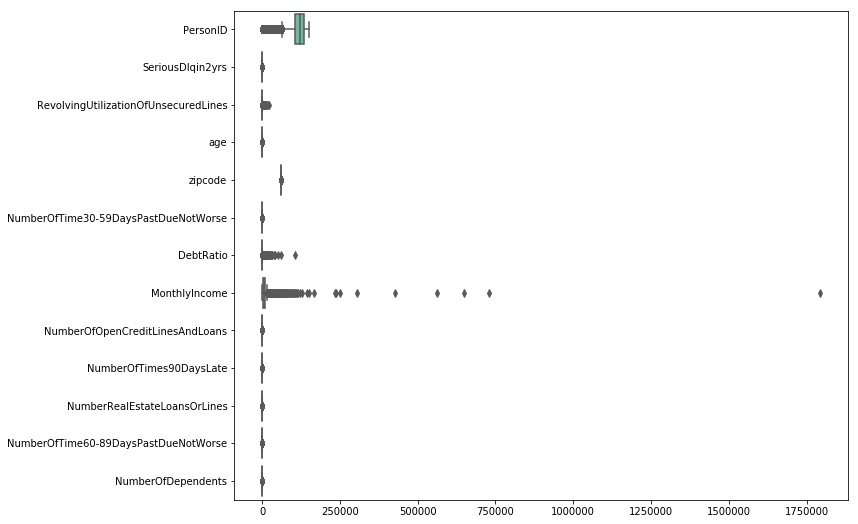

In [3]:
# Data Exploration: Stage I
mh.explore_features(df)

## III: Explore Feature Interactions

Explore feature interactions amongst each other. Helps in weeding verbose (highly correlated variables). Evaluated through
- Correlation heatmap: 
- Pairwsie plots for continous attributes  


Pairwise Feature Distribution: Variable Histograms
Pairwise Feature Distribution: Pairplot


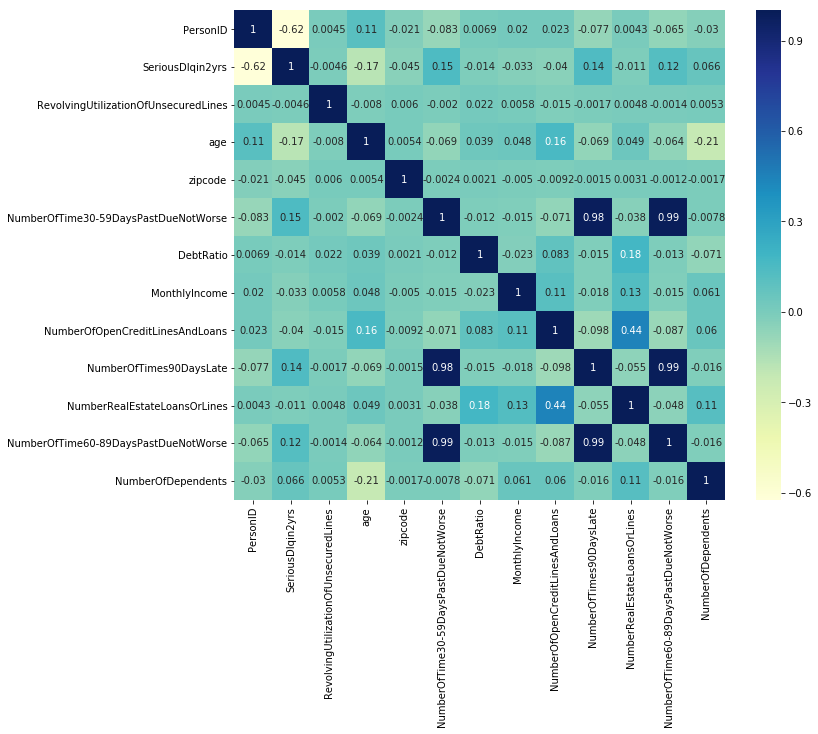

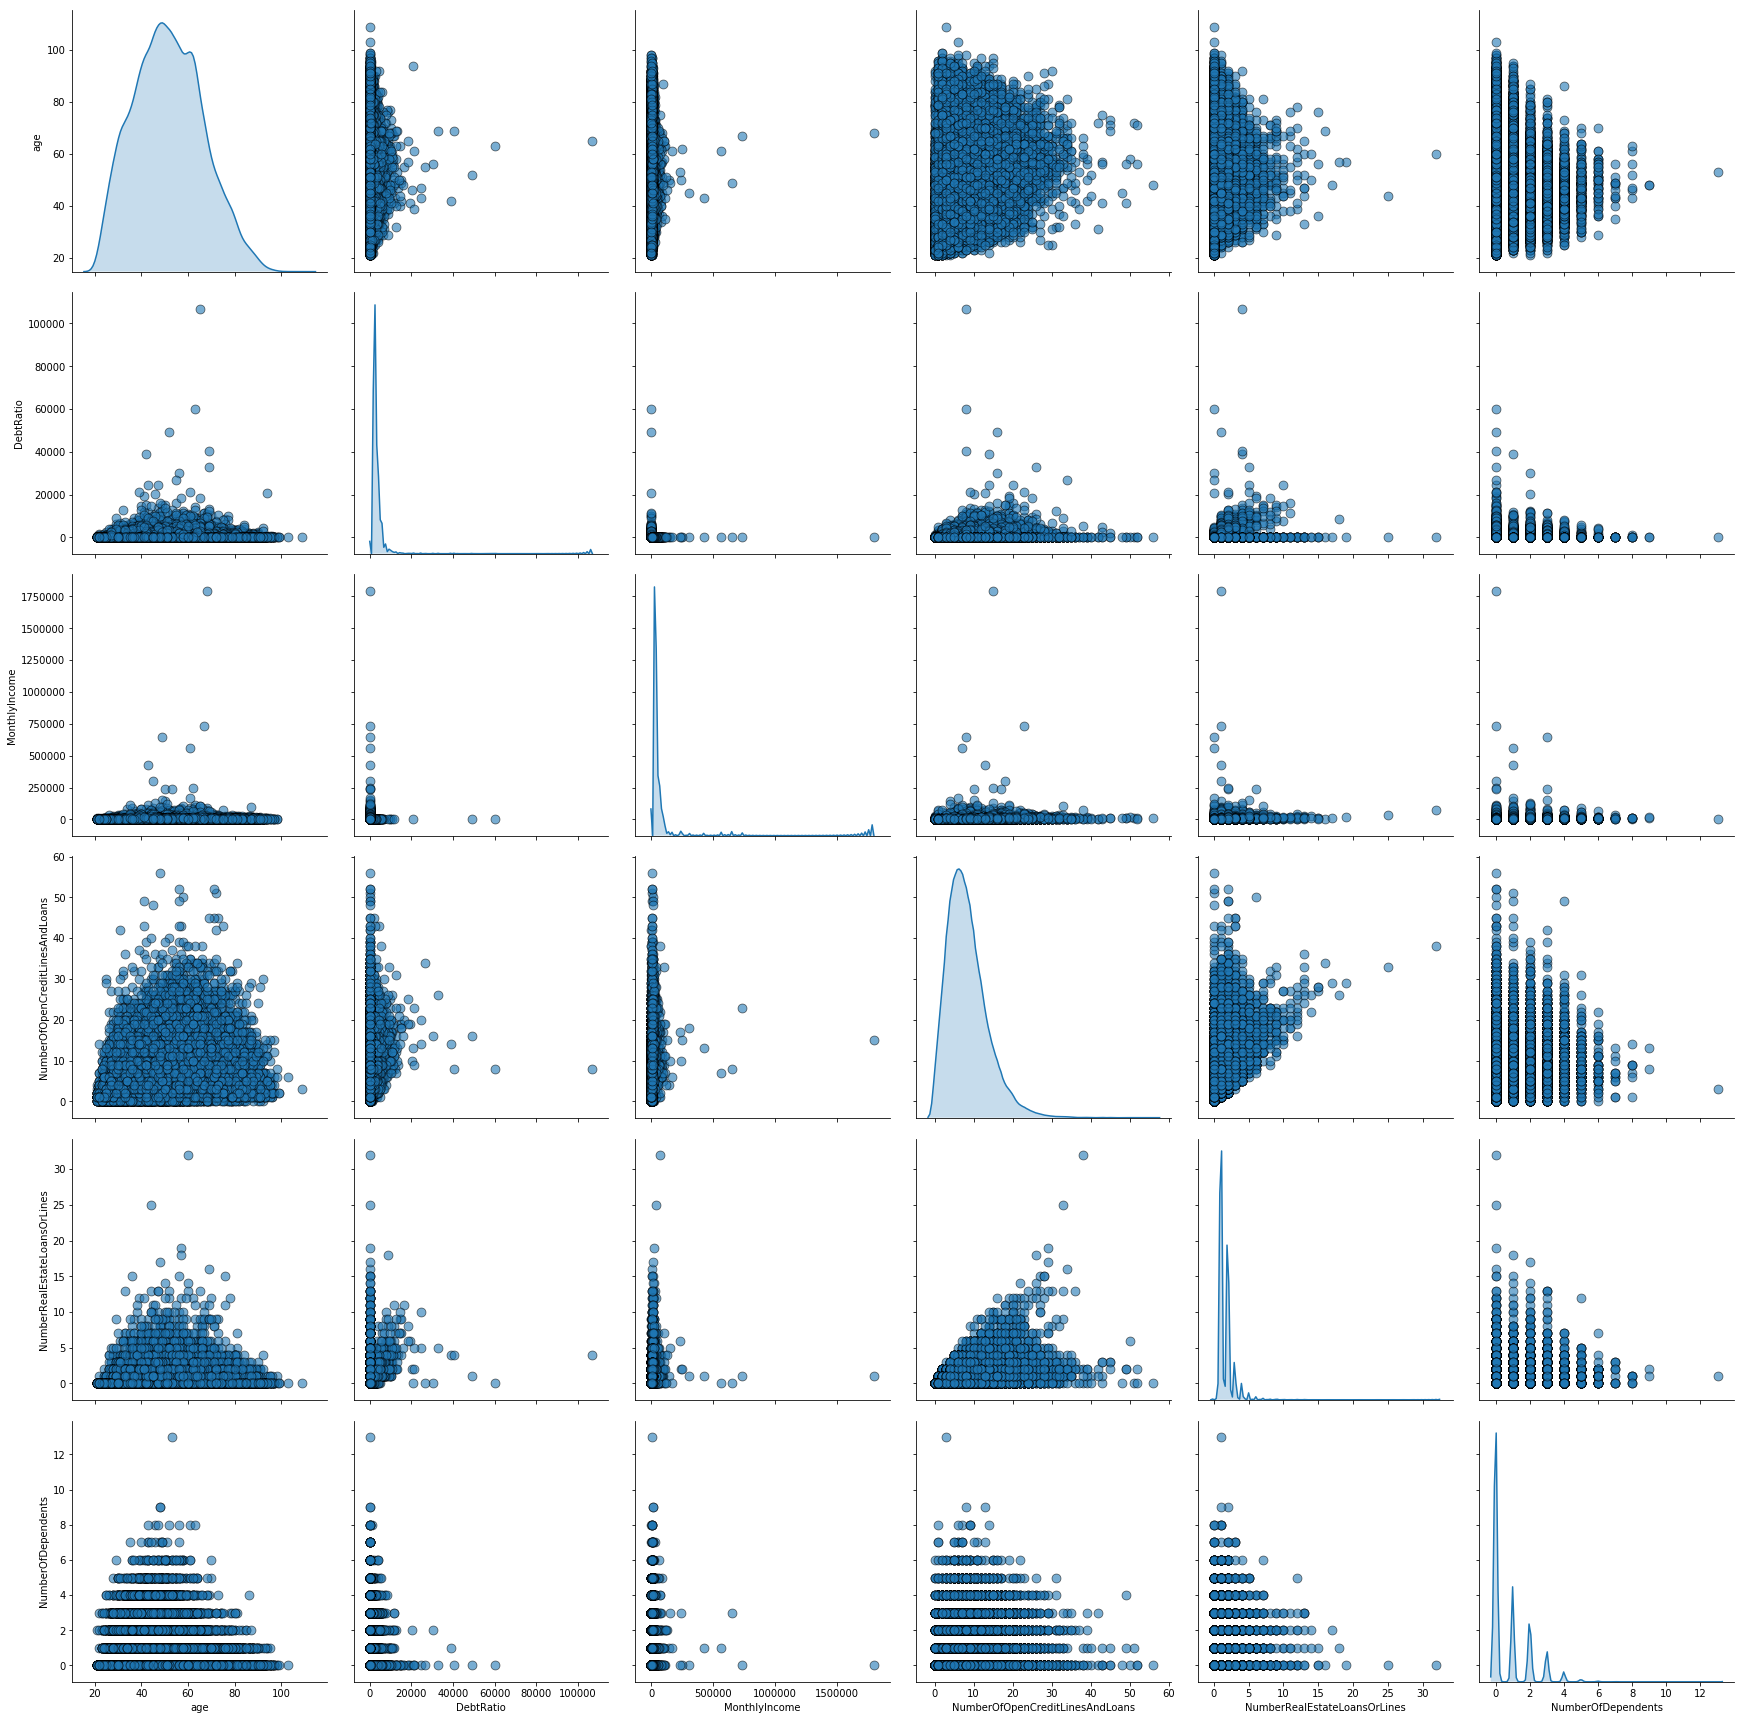

In [4]:
# Data Exploration: Stage II
cont_var = ['age', 'DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans',
        'NumberRealEstateLoansOrLines','NumberOfDependents']
mh.explore_finteractions(df, cont_var)

## <span style="color:red"> Pit Stop: Observations from Credit data </span>

Following quick observation may be drawn for data on 41 thousand individuals .

- Monthly Income shows high outlier values 
    - which is plausible given income variable have a symptomatic *right skewed* distirbution

- Most of the attributes show a *Gamma* distribution
    - which *supports* trying a non-parametric/Machine learning based method
    - conventional regression frameworks (in some cases even GLMM) might be inept in accurately extracting variance in such cases

- High pairwise correlation observed between NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate
    - dropped correlated attributes

- Low/negative correlation between Age and Number fo Dependents is consitent with a generic apriori understanding


Caveat
+ *A caevat of the given process is not discerning categorical and continous variables. It is likely that the given datasets might have mispscified/unusable data types. So, it helpful to in the first stage throw in the variables alltogether and use these results to understand the nature and use of these feature for the subjective analysis, expeditiously* 

### Conditioned Pairplot

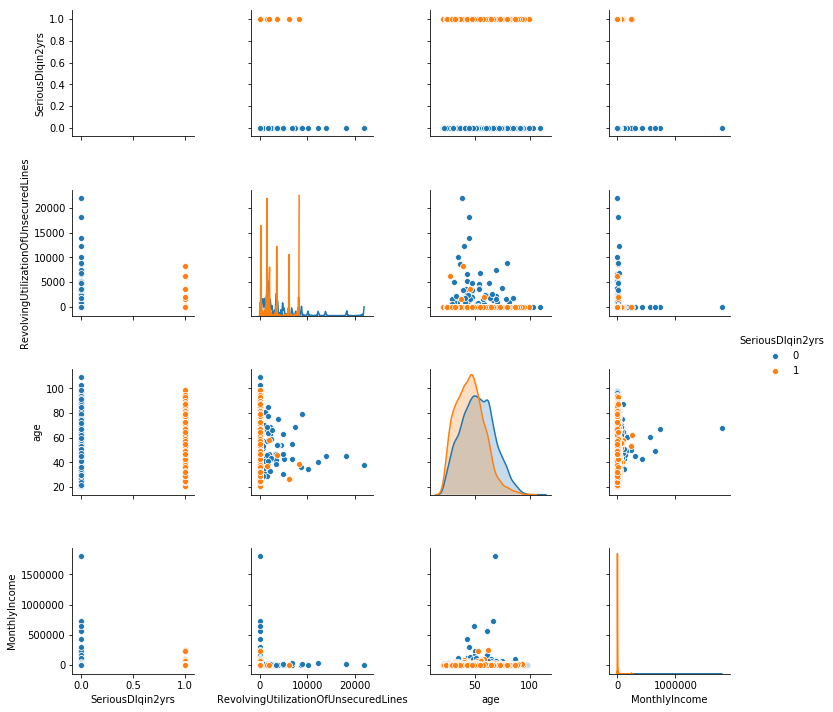

In [5]:
# Plot interactions with respect to Supervised (Y:SeriousDlqin2yrs) variable
df_samp = df[['SeriousDlqin2yrs','RevolvingUtilizationOfUnsecuredLines','age','MonthlyIncome']]
sns.pairplot(df_samp, hue="SeriousDlqin2yrs")

<span style="color:green"> This plot is particularly useful in showing which features help in discerning between chances of delinquency in the Y variable. As seen Revolving utilization explains difference the binary outcome (0,1) best, with the segregated multimodes. This result is verified in the model as well. </span>

## Drop Variables
There is high pairwise correlation between the three variables NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate
   - suggesting that *delinquency could be a sticky* /lumpen process in the given cohort
   - average individuals who delay beyond 1/2 months have higher chances of delaying to 3 months
   - NOTE: above is not a conclusively claim, but a behavioural hypothesis to explore 

In [6]:
# Drop Correlated Features
df = df.drop(labels=['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'], axis=1)

### Note on Outliers
NOTE: *Treating outliers did not seem particularly useful for the credit data in question. Outliers in income are plausible (and consistent with the inequality literature). If however required Z-scaores are a good way to examine individual feature distirbutions.*
`from scipy import stats
z1 = np.abs(stats.zscore(df))
z = np.abs(stats.zscore(df_c))`
One can further apply a threshold on the Z-value to filter our outlier.

## IV: Missing Values Treatment

- View a summery of missing proportion by columns 
- Replace missing values by mean/median as specified
    - specify mean=False for median
Caveat
+ *Missing data can be present in different forms based on data or filte type (na, null, NA ,NaN :0/0 forms, '.'). Getting a sense of meaning of the feature & format of the file type is helpfu. E.g. Stata uses '.', R uses 'NA' *

In [7]:
# Treat Missing Values: 
df = mh.treat_missing(df, mean=True)

Missing data summary


,Total,Percent
MonthlyIncome,7974,0.194412
NumberOfDependents,1037,0.025283
NumberRealEstateLoansOrLines,0,0.000000
NumberOfTimes90DaysLate,0,0.000000
NumberOfOpenCreditLinesAndLoans,0,0.000000
DebtRatio,0,0.000000
zipcode,0,0.000000
age,0,0.000000
RevolvingUtilizationOfUnsecuredLines,0,0.000000
SeriousDlqin2yrs,0,0.000000


## IV: Generate Features/Predictors

### A.) Transform continous to discrete

Variables that should be discretize based on data context.
- This can also be observed through the multimodal frequency distribution(s)
- Number of dependents
- Number of Open-credit & Real-estate lines (reasonable correlation between them as well)
- DebtRatio: considering skewness

NOTE: *Instead of adding transformed variables to the same data frame, the current implementation transforms into a new dataframe to reduce steps in variable name specification in model run* 

In [8]:
# A.) Variable to be transformed
var_tr = ['NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfDependents',
          'DebtRatio','NumberOfTimes90DaysLate']
df_tr = mh.cont_discr(df, var_tr, bins=5)

### IV B.) Create dummy 
Create dummy variable(s)

In [9]:
# B.) Create dummy for speicifed attributes
var_dummy = ['zipcode','DebtRatio']
df_tr = mh.cat_dummy(df_tr, var_dummy)

### IV C.) Prepare labels & features dataset
Create labels (supervised variable) and split 
- Selected 30% Test/Train split for now; can further use a loop for testing with different proportion
- Current implementation includes exhuastive features 
- Code referrence for this section Labs: https://github.com/dssg/MLforPublicPolicy/blob/master/labs/2018/lab3_knn_dt.ipynb

In [10]:
# C.) Create labels/features and Split
features = df_tr.drop(labels=['PersonID', 'SeriousDlqin2yrs'], axis=1)
labels = df_tr[['SeriousDlqin2yrs']]
# Split feature and label sets each into training and test sets.
X_train, X_test, Y_train, Y_test = train_test_split(features, labels,test_size=0.3)

## V: Build Classifier
Fitting a random forest vanilla model without specifications on hyperparametrs

In [11]:
# Base Decision Tree
delinq_rf = RandomForestClassifier()
# Fit the classifier
delinq_rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## VI: Evaluate Classifier
Test the model performance through the following metrics

#### VI a.) Model Accuracy  
Score train and test data on the fitted model
 - (i) Within Train (in sample)
 - (ii) In Test (hold-out)

As expected, accuracy is higher in sample, as the model is fitted onto this data

In [12]:
# Accuracy: Within
Y_pred_in = delinq_rf.predict(X_train)
print("Accuracy in sample:",round(accuracy(Y_train, Y_pred_in)*100,2),'%')
# With DecisontreeClassifier it was 78.26% ceterus paribus

# Accuracy: Test Data
Y_pred = delinq_rf.predict(X_test)
print("Accuracy:",round(accuracy(Y_test, Y_pred)*100,2),'%')
print('With DecisontreeClassifier accuracy was 78.26% ceterus paribus')

Accuracy in sample: 97.87 %
Accuracy: 83.08 %
With DecisontreeClassifier accuracy was 78.26% ceterus paribus


#### VI b.) Feature Importance

Reference: https://www.datacamp.com/community/tutorials/random-forests-classifier-python

No handles with labels found to put in legend.


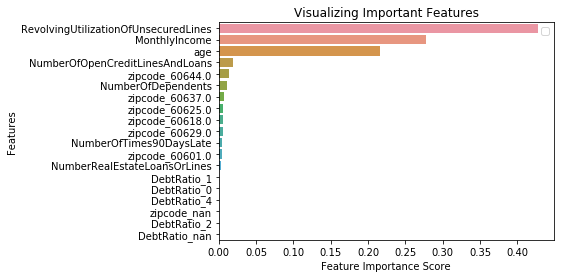

In [13]:
# Feature Importance
feature_imp = pd.Series(delinq_rf.feature_importances_,index=features.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#### VI c.) Confusion Matrix
Given the problem addresses classification, use Confusion Matrix to evaluate True/False Positves/Negatives
- Precision: ratio of correctly predicted positive observations to the total predicted positive observations
- Recall: the ratio of correctly predicted positive observations to the all observations in actual class - yes

In [14]:
# Confusion Matrix
pd.DataFrame(
    confusion_matrix(Y_test, Y_pred),
    columns=['Predicted Not Delinquent', 'Predicted Delinquent'],
    index=['Actual Not Delinquent', 'Actual Delinquent'])

,Predicted Not Delinquent,Predicted Delinquent
Actual Not Delinquent,9739,559
Actual Delinquent,1523,484


In [15]:
print('Precision:',9827/(9827+1485))
print('Recall:',9827/(9827+539))

Precision: 0.8687234794908062
Recall: 0.9480030870152422


Interpretation: Both indicators give satisfactory results
+ Precision: Of all individuals labeled as facing financial disstress in next two years ~87% actually faced delinquency suggesting low false positive rate
+ Recall: The classifier labeled ~95% of all the individuals that facing financial disstress in next two years.

#### VI d.) Tree growth

In [16]:
threshold = 0.3
depths = [1, 3, 5, 7, 9, 15, 20, 38, 50, 65, 85, 100, 250, 500]
calc_threshold = lambda x,y: 0 if x < y else 1 
for d in depths:
    dec_tree = RandomForestClassifier(max_depth=d)
    dec_tree.fit(X_train, Y_train)

    train_scores = dec_tree.predict_proba(X_train)[:,1]
    test_scores = dec_tree.predict_proba(X_test)[:,1]
   
    predicted_train = np.array( [calc_threshold(score, threshold) for score in train_scores] )
    train_acc = accuracy(predicted_train, Y_train)   

    predicted_test = np.array( [calc_threshold(score, threshold) for score in test_scores] )
    test_acc = accuracy(predicted_test, Y_test)
    
    print("Depth: {} | Train acc: {:.2f} | Test acc: {:.2f}".format(d, train_acc, test_acc))

Depth: 1 | Train acc: 0.84 | Test acc: 0.84
Depth: 3 | Train acc: 0.84 | Test acc: 0.84
Depth: 5 | Train acc: 0.82 | Test acc: 0.81
Depth: 7 | Train acc: 0.82 | Test acc: 0.81
Depth: 9 | Train acc: 0.83 | Test acc: 0.82
Depth: 15 | Train acc: 0.89 | Test acc: 0.80
Depth: 20 | Train acc: 0.94 | Test acc: 0.78
Depth: 38 | Train acc: 0.96 | Test acc: 0.76
Depth: 50 | Train acc: 0.96 | Test acc: 0.76
Depth: 65 | Train acc: 0.96 | Test acc: 0.76
Depth: 85 | Train acc: 0.96 | Test acc: 0.76
Depth: 100 | Train acc: 0.96 | Test acc: 0.76
Depth: 250 | Train acc: 0.96 | Test acc: 0.77
Depth: 500 | Train acc: 0.96 | Test acc: 0.76


## Model Result & Summary

### Interpretation
+ The given random forest model has performed with close to 84%. within 
  - within sample accuracy is expectedly much higher ~97% as model was built on that data
+ 'RevolvingUtilizationOfUnsecuredLines' is observed to explain the variance best
  - this can also be seen in the conditional pairplot 
  - subsequent important variables include MonthlyIncome and Age of the inidividual
+ *Risks to delinquency therefore may be characterised by:
  - investment in unsecured lines  
  - higher income (impying higher risk apetite)
  - age (which could be due to it's correlation to monthlyincome and not necessarily to unsecured lines investment)
  - all these are more or consistent with apriori understanding*

### Model Framework
+ The selection of categorical and continous variable was based on their distribution
  - variables with near balanced distribution were kept continous
  - variables with ordinal characterstics with considered discrete
+ Based on random selection of trees (tree growth), there is progressive decline in model accuracy, highest in the first tree with 84%. 
  - this can be held consistent with progressive learning of model 
  - the first tree is able to capture the variance in the Y variable best akin gradient descend algorithm
+ Furthermore, with a progressive decline in accuracy, one may even built a leaner tree
  - this could be lesser taxing on the memory

## VII: Visualise Tree


Reference: http://www.graphviz.org/pdf/dotguide.pdf

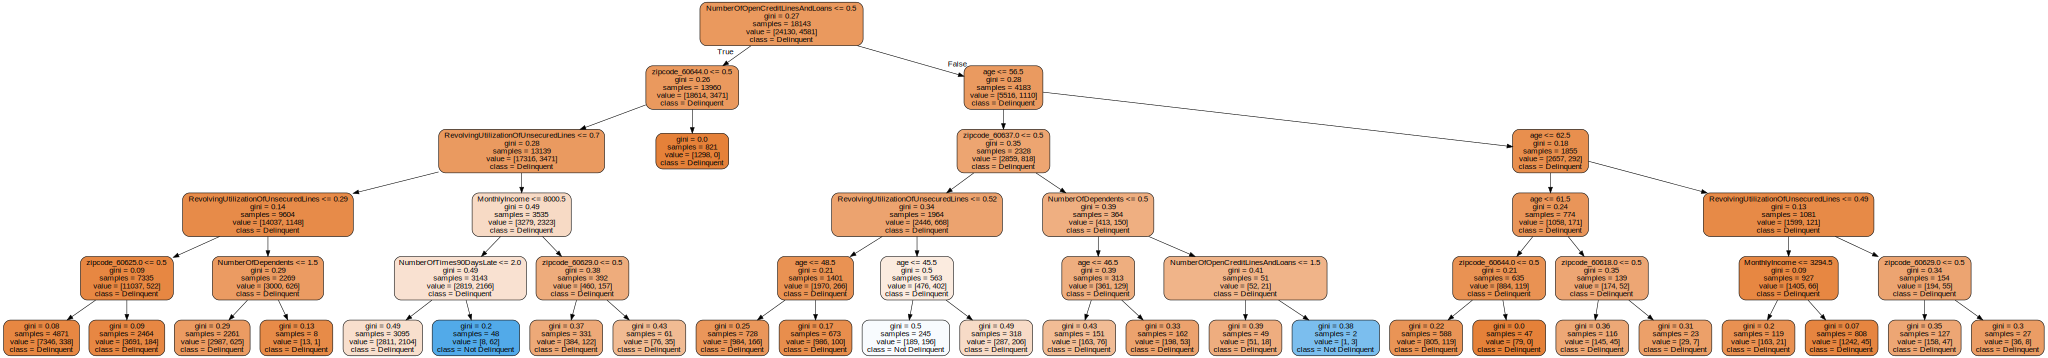

In [17]:
# Base Decision Tree with restrained depth
model = RandomForestClassifier(max_depth=5)
# Fit the classifier
model.fit(X_train, Y_train)

# Extract single tree
estimator = model.estimators_[3]

# Export as dot file
export_graphviz(estimator,out_file='charts/tree_cr.dot',
                feature_names=X_train.columns.tolist(),
                class_names=['Delinquent','Not Delinquent'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert .dot to .png format for view
graphviz.render('dot', 'png', 'charts/tree_cr.dot')

# Plot Tree
graphviz.Source.from_file('charts/tree_cr.dot')

### Assumptions & Revisions
+ Some assumptions made in model results are as considered in statistical context. They are open to correction/improvemnt with learning more about the working of the model
+ Comparison with linear regression would help in showing marginal difference in model performance 
+ Current form of model does not include working with hyperparameters and tree pruning, CV
  - further work can be done to control for possible overfitting  

## FIN. ![Stormtroopocat](https://octodex.github.com/images/stormtroopocat.jpg "The Stormtroopocat")